In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import nltk
from nltk.tokenize import PunktSentenceTokenizer

In [96]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
house_data = pd.read_csv("HouseDataFinal.csv", index_col=0, header=0)
house_data

,1/2 Bathrooms,Annual Tax Amount,Area,Association,Association Amenities,Association Fee,Association Fee Frequency,Association Fee Includes,Association Name,Baths,...,Total Bathrooms,Type,View,Water Body Name,Water Features,Water Source,Year Built,Year Built Details,description,url
Address,,,,,,,,,,,,,,,,,,,,,
"5505 Hudson St,Austin,TX78721",0.0,5793.00,5.0,NaN,NaN,0.0,NaN,NaN,NaN,2.0,...,2 / 0,Single Family Home,No View,NaN,NaN,City,1998.0,Resale,Great opportunity for a possible remodel or te...,https://www.realtor.com/realestateandhomes-det...
"8508 White Cliff Dr,Austin,TX78759",0.0,6012.00,1N,NaN,NaN,0.0,NaN,NaN,NaN,3.0,...,3 / 0,Single Family Home,Woods,NaN,NaN,"City, See Agent",1985.0,Resale,This 2-story home has been converted into a du...,https://www.realtor.com/realestateandhomes-det...
"10748 Yorktown Trl,Austin,TX78726",0.0,9204.00,NW,Yes,NaN,34.0,Monthly,Common Area Maintenance,Canyon Creek,2.0,...,2 / 0,Single Family Home,No View,NaN,NaN,City,1993.0,Resale,This is the house for you! This spacious one s...,https://www.realtor.com/realestateandhomes-det...
"2217 Onion Creek Pkwy Unit 120,Austin,TX78747",0.0,5982.00,SC,Yes,NaN,270.0,Monthly,See Agent,Windrock HOA,2.0,...,2 / 0,Condo/Townhome/Row Home/Co-Op,NaN,NaN,NaN,City,1978.0,Resale,RECENTLY RENOVATED HOME IN Windrock Condo Amd....,https://www.realtor.com/realestateandhomes-det...
"12914 Lamplight Village Ave,Austin,TX78727",0.0,6615.00,N,NaN,NaN,0.0,NaN,NaN,NaN,2.0,...,2 / 0,Single Family Home,No View,NaN,NaN,City,1977.0,Resale,Charming 70's style home with all hard floorin...,https://www.realtor.com/realestateandhomes-det...
"11003 Galleria Cv,Austin,TX78759",1.0,8334.00,1N,NaN,NaN,0.0,Monthly,NaN,NaN,2.5,...,2 / 1,Single Family Home,"Greenbelt, Panoramic, Woods",NaN,NaN,City,1990.0,Resale,"Fantastic curb appeal, spacious updated kitche...",https://www.realtor.com/realestateandhomes-det...
"6202 Rain Creek Pkwy,Austin,TX78759",1.0,10437.83,1N,Yes,NaN,250.0,See Agent,See Agent,Great Hills HOA,2.5,...,2 / 1,Single Family Home,Hill Country,NaN,NaN,City,1984.0,Resale,Incredible views in Great Hills from every roo...,https://www.realtor.com/realestateandhomes-det...
"4606 Horseshoe Bnd,Austin,TX78731",0.0,13579.00,1B,NaN,"Park, Play Ground, Sport Court(s), Sport Faci...",0.0,NaN,NaN,NaN,2.0,...,2 / 0,Single Family Home,"Greenbelt, Woods",NaN,NaN,City,1948.0,NaN,A unique property combines a lovely renovated ...,https://www.realtor.com/realestateandhomes-det...
"9021 Corran Ferry Dr,Austin,TX78749",1.0,7421.00,10S,Yes,"Play Ground, Pool-Community, Underground Util...",41.0,Monthly,Common Area Maintenance,Sendera HOA,2.5,...,2 / 1,Single Family Home,Woods,NaN,NaN,City,1998.0,Resale,Fantastic value in the Sendera neighborhood in...,https://www.realtor.com/realestateandhomes-det...


In [4]:
sns.set(rc={'figure.figsize':(15,8)})

In [58]:
t = np.random.power(1.5,10000)

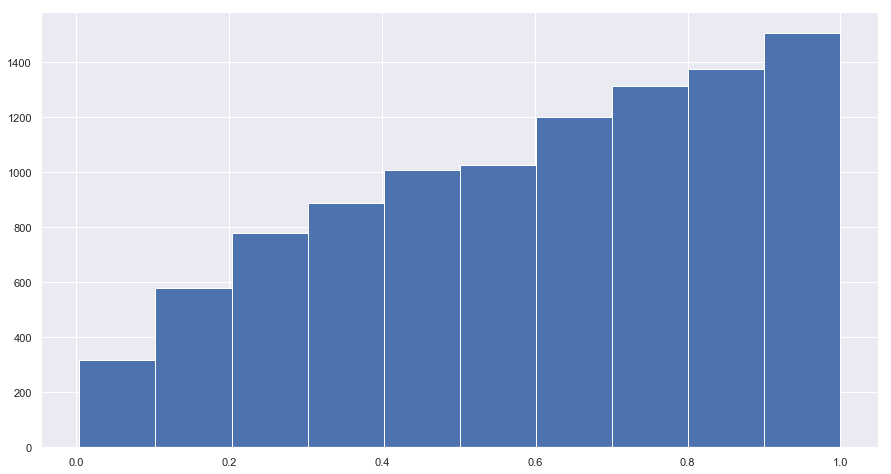

In [59]:
plt.hist(t)
plt.show()

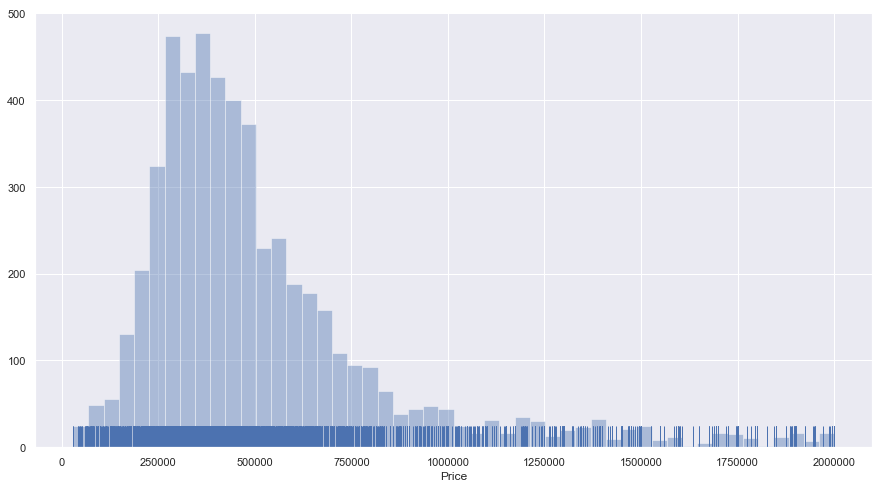

In [5]:
data = house_data["Price"] < 2000000
data = house_data[data]

pl = sns.distplot(data["Price"], kde=False, rug=True)
pl

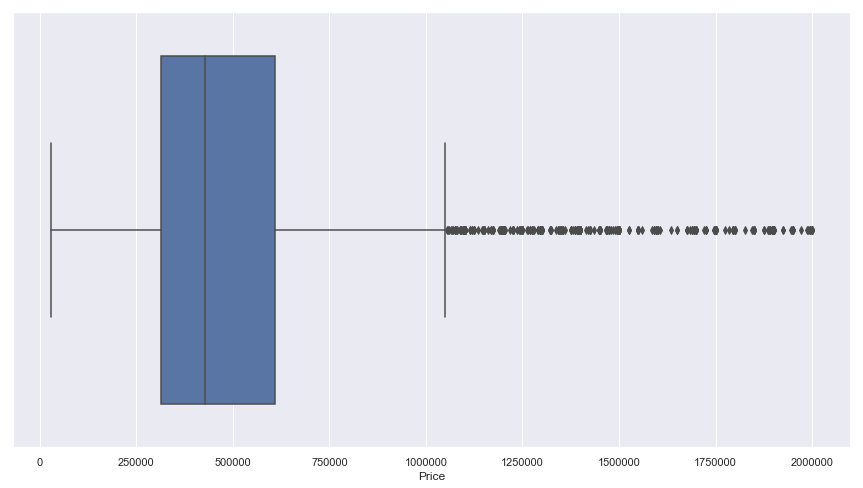

In [15]:
pr = sns.boxplot(x=data["Price"])
pr

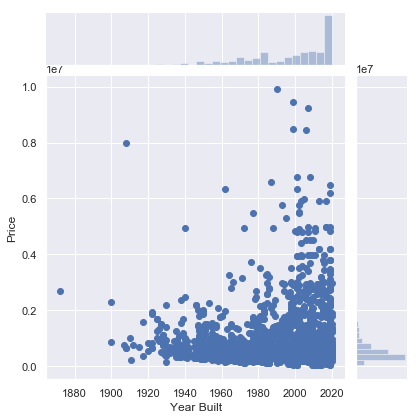

In [8]:
house_data = house_data[house_data['Price'] <= 10000000]
pp = sns.jointplot(x = "Year Built", y = "Price", data=house_data[house_data['Year Built'] != 0].loc[:, ['Price', 'Year Built']])
pp

In [30]:
house_data[house_data["Sqft"] > 20000].loc[:, ['Baths', 'Price', 'url']]

,Baths,Price,url
Address,,,
"4433 River Garden Trl,Austin,TX78746",8.5,12900000,https://www.realtor.com/realestateandhomes-det...


In [31]:
house_data.loc['4433 River Garden Trl,Austin,TX78746', 'url']

'https://www.realtor.com/realestateandhomes-detail/realestateandhomes-detail/4433-River-Garden-Trl_Austin_TX_78746_M81737-32686'

In [101]:
document = 'This Clarksville store is one of the best and oldest folk art stores in Austin. The owners really know where to find the best pottery, jewelry, and textiles south of the border. The selection of Oaxacan ceramics is notable, and the store also stocks Guatemalan fabric by the yard. The store features the work of notable Mexican and Southwestern folk artists and often brings them to the store for special appearances.'
sentences = nltk.sent_tokenize(document)   
for sent in sentences:
    print(nltk.pos_tag(nltk.word_tokenize(sent)))

[('This', 'DT'), ('Clarksville', 'NNP'), ('store', 'NN'), ('is', 'VBZ'), ('one', 'CD'), ('of', 'IN'), ('the', 'DT'), ('best', 'JJS'), ('and', 'CC'), ('oldest', 'JJS'), ('folk', 'JJ'), ('art', 'NN'), ('stores', 'NNS'), ('in', 'IN'), ('Austin', 'NNP'), ('.', '.')]
[('The', 'DT'), ('owners', 'NNS'), ('really', 'RB'), ('know', 'VBP'), ('where', 'WRB'), ('to', 'TO'), ('find', 'VB'), ('the', 'DT'), ('best', 'JJS'), ('pottery', 'NN'), (',', ','), ('jewelry', 'NN'), (',', ','), ('and', 'CC'), ('textiles', 'NNS'), ('south', 'RB'), ('of', 'IN'), ('the', 'DT'), ('border', 'NN'), ('.', '.')]
[('The', 'DT'), ('selection', 'NN'), ('of', 'IN'), ('Oaxacan', 'JJ'), ('ceramics', 'NNS'), ('is', 'VBZ'), ('notable', 'JJ'), (',', ','), ('and', 'CC'), ('the', 'DT'), ('store', 'NN'), ('also', 'RB'), ('stocks', 'NNS'), ('Guatemalan', 'NNP'), ('fabric', 'NN'), ('by', 'IN'), ('the', 'DT'), ('yard', 'NN'), ('.', '.')]
[('The', 'DT'), ('store', 'NN'), ('features', 'VBZ'), ('the', 'DT'), ('work', 'NN'), ('of', 'IN'